# Dataset
Download the Microsoft Malware Prediction dataset from Kaggle's Microsoft Malware Prediction Challenge page. Note: You will need a Kaggle account to do this.

# Overview of the dataset

## Size and Scope:
- The dataset contains telemetry data from millions of Windows-based devices.
- Each row corresponds to a device or a machine.
## Features:
- The dataset contains a mix of binary features, categorical features, and continuous numerical features.
- Features encompass a wide range of characteristics, including:
    - Machine Information: Details like the OS version, RAM, disk capacity, etc.
    - Software Information: Details of software-related attributes like the antivirus software in use, browser, and other software configurations.
    - Network Information: Data regarding network configurations, domain join status, etc.
    - Update and Upgrade Information: Details about OS updates, build revisions, etc.
    - Miscellaneous Flags: Various binary flags indicating the state/configuration of the machine.
## Target Variable:
- HasDetections: A binary flag (0 or 1) that indicates if malware was detected on the machine.
    - 1 means malware was detected.
    - 0 means no malware was detected.
## Challenges:
- High Dimensionality: The dataset has a large number of features, which can make modeling more complex and require feature selection/engineering.
- Missing Values: Some features have missing values, requiring imputation or other data preprocessing strategies.
- Class Imbalance: Depending on the subset or how the data is processed, there can be class imbalances between malware detected vs. not detected.


# Loading the Data

In [1]:
import pandas as pd

# Define the data types (to reduce memory usage)
dtypes = {
    'MachineIdentifier': 'category',
    'ProductName': 'category',
    'EngineVersion': 'category',
    'AppVersion': 'category',
    'AvSigVersion': 'category',
    'IsBeta': 'int8',
    'RtpStateBitfield': 'float16',
    #... Add other columns with their respective data types as needed
}

# Load a subset of the data (e.g., 10%)
data_sample = pd.read_csv('../../../Downloads/microsoft-malware-prediction/train.csv', dtype=dtypes, skiprows=lambda i: i>0 and i % 100 != 0)

data_sample.head()


/var/folders/83/26rn6hkd1l14k7rv3jsttd8c0000gn/T/ipykernel_75191/1324217014.py:16: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sample = pd.read_csv('../../../Downloads/microsoft-malware-prediction/train.csv', dtype=dtypes, skiprows=lambda i: i>0 and i % 100 != 0)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000cc9bb0870e747fa9da65a7f3f5cd,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1534.0,0,7.0,0,NaN,38993.0,...,52138.0,1,0.0,0.0,0,0,0.0,0.0,1.0,0
1,000182abf815a4c4d5c3c8014a0399cb,win8defender,1.1.14901.4,4.12.17007.18022,1.269.345.0,0,7.0,0,NaN,62773.0,...,32994.0,1,0.0,0.0,0,0,0.0,1.0,10.0,1
2,00024314e5133e9e93cdf080accdd083,win8defender,1.1.14901.4,4.14.17639.18041,1.269.149.0,0,7.0,0,NaN,7945.0,...,20106.0,1,0.0,0.0,0,0,0.0,0.0,11.0,0
3,0002f9e87915a4c5e45f3513adc26dcf,win8defender,1.1.15200.1,4.11.15063.0,1.275.1047.0,0,7.0,0,NaN,46413.0,...,69288.0,1,NaN,0.0,0,0,0.0,NaN,NaN,1
4,0003add4df20fa999fe04369a91825c7,win8defender,1.1.15100.1,4.12.16299.15,1.273.1788.0,0,7.0,0,NaN,7945.0,...,63543.0,1,NaN,0.0,0,0,0.0,1.0,3.0,1


# Data Exploration

In [2]:
print("size =",data_sample.memory_usage().sum()/1024**2,"MB")

size = 55.606197357177734 MB


In [3]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89214 entries, 0 to 89213
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   MachineIdentifier                                  89214 non-null  category
 1   ProductName                                        89214 non-null  category
 2   EngineVersion                                      89214 non-null  category
 3   AppVersion                                         89214 non-null  category
 4   AvSigVersion                                       89214 non-null  category
 5   IsBeta                                             89214 non-null  int8    
 6   RtpStateBitfield                                   88903 non-null  float16 
 7   IsSxsPassiveMode                                   89214 non-null  int64   
 8   DefaultBrowsersIdentifier                          4230 non-null   float64 


## Target Distribution

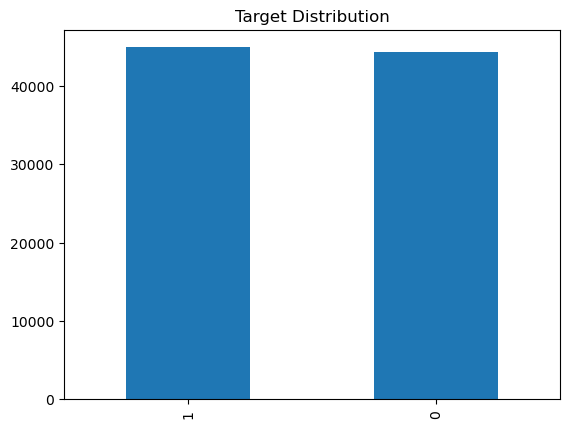

In [4]:
import matplotlib.pyplot as plt

data_sample['HasDetections'].value_counts().plot(kind='bar', title='Target Distribution')
plt.show()

## Missing Data

In [5]:
missing = data_sample.isnull().sum().sort_values(ascending=False)
missing_percent = (data_sample.isnull().sum()/data_sample.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Percent'])

# Displaying columns with more than 20% missing values
missing_data[missing_data['Percent'] > 0.2]


,Total,Percent
PuaMode,89195,0.999787
Census_ProcessorClass,88831,0.995707
DefaultBrowsersIdentifier,84984,0.952586
Census_IsFlightingInternal,74034,0.829847
Census_InternalBatteryType,63279,0.709295
Census_ThresholdOptIn,56563,0.634015
Census_IsWIMBootEnabled,56483,0.633118
SmartScreen,31771,0.356121
OrganizationIdentifier,27439,0.307564


# Missing Data Handling

In [6]:
# Before removal: Get an overview of missing data
missing_data_before = data_sample.isnull().sum()

print("Missing data counts before removal:")
print(missing_data_before)

# Remove rows with any missing values
data_cleaned_rows = data_sample.dropna()

# Remove columns with any missing values
data_cleaned_columns = data_sample.dropna(axis=1)

# After removal: Get an overview of missing data
missing_data_after_rows = data_cleaned_rows.isnull().sum()
missing_data_after_columns = data_cleaned_columns.isnull().sum()

print("\nMissing data counts after row-wise removal:")
print(missing_data_after_rows)

print("\nMissing data counts after column-wise removal:")
print(missing_data_after_columns)

print("lenght of the data before removing rows with missing values =",len(data_sample))
print("length of the data after removing rows with missing values =",len(data_cleaned_rows))

Missing data counts before removal:
MachineIdentifier                             0
ProductName                                   0
EngineVersion                                 0
AppVersion                                    0
AvSigVersion                                  0
                                           ... 
Census_IsPenCapable                           0
Census_IsAlwaysOnAlwaysConnectedCapable     758
Wdft_IsGamer                               3048
Wdft_RegionIdentifier                      3048
HasDetections                                 0
Length: 83, dtype: int64

Missing data counts after row-wise removal:
MachineIdentifier                          0.0
ProductName                                0.0
EngineVersion                              0.0
AppVersion                                 0.0
AvSigVersion                               0.0
                                          ... 
Census_IsPenCapable                        0.0
Census_IsAlwaysOnAlwaysConnectedCapab

In [8]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Automatically detect string columns and apply one-hot encoding
string_columns = data_sample.select_dtypes(include=['object','category']).columns
string_columns = string_columns.drop(['ProductName','Platform','OsVer'])
print("Columns to be dropped = ", string_columns)

df = data_sample.drop(string_columns, axis=1)

df = pd.get_dummies(df, columns=['ProductName','Platform','OsVer'])

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=3, random_state=42)

# Apply the imputer
data_imputed = imputer.fit_transform(df)

# Convert the result back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=df.columns)
data_imputed_df.head()

Columns to be dropped =  Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'Processor', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition',
       'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_ProcessorClass',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType',
       'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch',
       'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')


/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,OsVer_10.0.0.0,OsVer_10.0.0.1,OsVer_10.0.0.112,OsVer_10.0.1.0,OsVer_10.0.19.80,OsVer_10.0.3.0,OsVer_6.1.0.0,OsVer_6.1.1.0,OsVer_6.1.3.0,OsVer_6.3.0.0
0,0.0,7.0,0.0,1491.618290,38993.0,2.0,1.0,1.0,107.0,51402.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,0.0,1695.013129,62773.0,1.0,1.0,1.0,166.0,33000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,1696.172269,7945.0,2.0,1.0,1.0,220.0,114417.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,0.0,1753.810839,46413.0,2.0,1.0,1.0,142.0,74924.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,7.0,0.0,1761.530137,7945.0,2.0,1.0,1.0,171.0,96401.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(len(data_sample.columns))
print(len(data_imputed_df.columns))


83
71


# Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split
y = data_imputed_df.HasDetections
X = data_imputed_df.drop('HasDetections', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Predictions

In [12]:
y_pred = model.predict(X_test)

# Model Evaluation

In [13]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5011489099366698
ROC AUC: 0.5001761590261317
              precision    recall  f1-score   support

         0.0       0.52      0.00      0.01      8904
         1.0       0.50      1.00      0.67      8939

    accuracy                           0.50     17843
   macro avg       0.51      0.50      0.34     17843
weighted avg       0.51      0.50      0.34     17843

